In [46]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import fastf1 as ff1
from fastf1.core import Laps
from fastf1 import utils
from fastf1 import plotting
plotting.setup_mpl()
from timple.timedelta import strftimedelta

In [47]:
ff1.Cache.enable_cache('C:\code\python/2022_season_analysis_CODES')

QUALIFYING

In [48]:
bahrain_quali = ff1.get_session(2022, 'Bahrain', 'Q')
print(bahrain_quali.date)


2022-03-19 18:00:00


In [49]:
bahrain_quali.load();
bahrain_quali_laps = bahrain_quali.laps

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '55', '11', '44', '77', '20', '14', '63', '10', '31', '47', '4', '23', '24', '22', '27', '3', '18', '6']


In [50]:
fastest_quali_lap = bahrain_quali_laps.pick_fastest()
fastest_quali_lap

Time                      0 days 01:14:47.968000
DriverNumber                                  16
LapTime                   0 days 00:01:30.558000
LapNumber                                     14
Stint                                          5
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:29.115000
Sector2Time               0 days 00:00:38.702000
Sector3Time               0 days 00:00:22.741000
Sector1SessionTime        0 days 01:13:46.525000
Sector2SessionTime        0 days 01:14:25.227000
Sector3SessionTime        0 days 01:14:47.968000
SpeedI1                                    241.0
SpeedI2                                    270.0
SpeedFL                                    288.0
SpeedST                                    316.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife                                     3.0
FreshTyre           

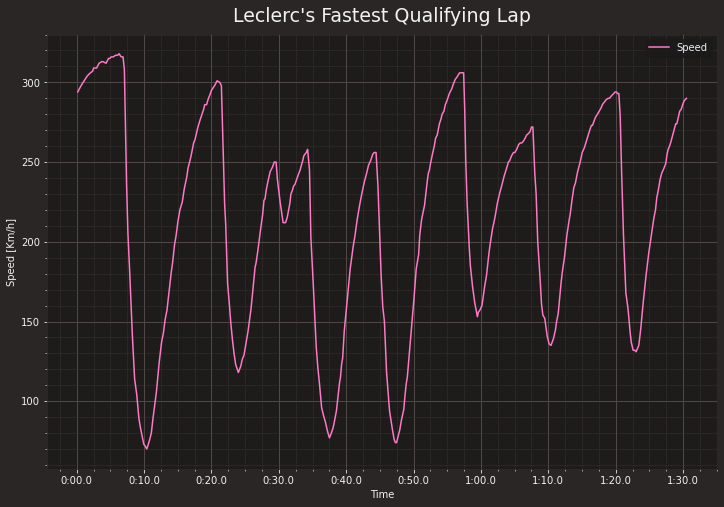

In [51]:
lec_fastest_quali_lap = bahrain_quali_laps.pick_driver('LEC').pick_fastest()
lec_car_data = lec_fastest_quali_lap.get_car_data()
t = lec_car_data['Time']
velo = lec_car_data['Speed']

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(t, velo, label='Speed')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title("Leclerc's Fastest Qualifying Lap")
ax.legend()

In [52]:
bahrain_quali.results[:10]

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,1.0,0.0,0 days 00:01:31.471000,0 days 00:01:30.932000,0 days 00:01:30.558000,NaT,,0.0
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,2.0,0.0,0 days 00:01:31.785000,0 days 00:01:30.757000,0 days 00:01:30.681000,NaT,,0.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,3.0,0.0,0 days 00:01:31.567000,0 days 00:01:30.787000,0 days 00:01:30.687000,NaT,,0.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,4.0,0.0,0 days 00:01:32.311000,0 days 00:01:31.008000,0 days 00:01:30.921000,NaT,,0.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,5.0,0.0,0 days 00:01:32.285000,0 days 00:01:31.048000,0 days 00:01:31.238000,NaT,,0.0
77,77,V BOTTAS,BOT,Alfa Romeo,b12039,Valtteri,Bottas,Valtteri Bottas,6.0,0.0,0 days 00:01:31.919000,0 days 00:01:31.717000,0 days 00:01:31.560000,NaT,,0.0
20,20,K MAGNUSSEN,MAG,Haas F1 Team,b6babd,Kevin,Magnussen,Kevin Magnussen,7.0,0.0,0 days 00:01:31.955000,0 days 00:01:31.461000,0 days 00:01:31.808000,NaT,,0.0
14,14,F ALONSO,ALO,Alpine,2293d1,Fernando,Alonso,Fernando Alonso,8.0,0.0,0 days 00:01:32.346000,0 days 00:01:31.621000,0 days 00:01:32.195000,NaT,,0.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,9.0,0.0,0 days 00:01:32.269000,0 days 00:01:31.252000,0 days 00:01:32.216000,NaT,,0.0
10,10,P GASLY,GAS,AlphaTauri,4e7c9b,Pierre,Gasly,Pierre Gasly,10.0,0.0,0 days 00:01:32.096000,0 days 00:01:31.635000,0 days 00:01:32.338000,NaT,,0.0


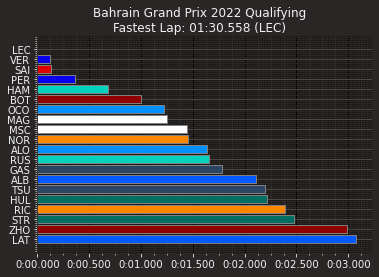

In [53]:
drivers = pd.unique(bahrain_quali.laps['Driver'])
#print(drivers)

list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = bahrain_quali.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    team_colors.append(color)

fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

ax.invert_yaxis()

ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{bahrain_quali.event['EventName']} {bahrain_quali.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()


c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1095: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '55', '11', '44', '77', '20', '14', '63', '10', '31', '47', '4', '23', '24', '22', '27', '3', '18', '6'

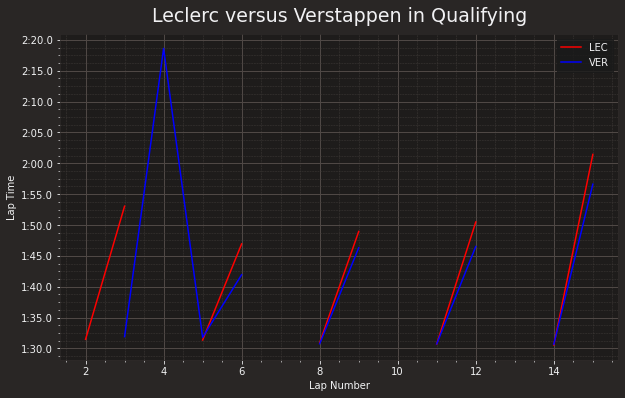

In [54]:
laps = bahrain_quali.load_laps(with_telemetry=True)
drv_1 = laps.pick_driver('LEC')
drv_2 = laps.pick_driver('VER')

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(drv_1['LapNumber'], drv_1['LapTime'], color='red')
ax.plot(drv_2['LapNumber'], drv_2['LapTime'], color='blue')
ax.set_title('Leclerc versus Verstappen in Qualifying')
ax.set_xlabel('Lap Number')
ax.set_ylabel("Lap Time")
plt.legend(['LEC', 'VER'])

c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1095: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '55', '11', '44', '77', '20', '14', '63', '10', '31', '47', '4', '23', '24', '22', '27', '3', '18', '6'

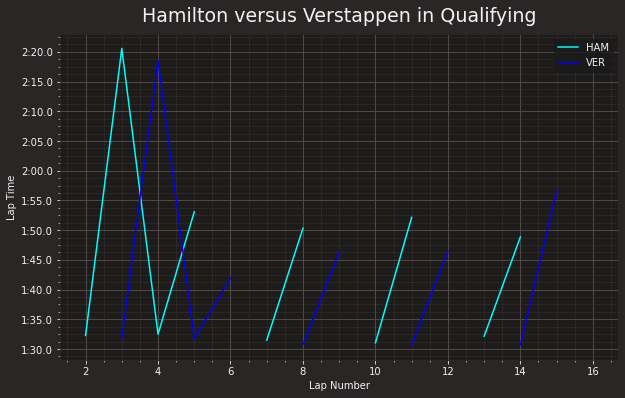

In [55]:
laps = bahrain_quali.load_laps(with_telemetry=True)
ham = laps.pick_driver('HAM')
ver = laps.pick_driver('VER')

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ham['LapNumber'], ham['LapTime'], color='cyan')
ax.plot(ver['LapNumber'], ver['LapTime'], color='blue')
ax.set_title('Hamilton versus Verstappen in Qualifying')
ax.set_xlabel('Lap Number')
ax.set_ylabel("Lap Time")
plt.legend(['HAM', 'VER'])

RACE

In [56]:
bahrain_race = ff1.get_session(2022, 'Bahrain', 'R')
print(bahrain_race.date)

2022-03-20 18:00:00


In [57]:
bahrain_race.load();
bahrain_race_laps = bahrain_race.laps
bahrain_race_laps

core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '44', '63', '20', '77', '31', '22', '14', '24', '47', '18', '23', '3', '4', '6', '27', '11', '1', '10']


,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:04:14.256000,16,NaT,1,1,0 days 00:24:54.765000,NaT,NaT,0 days 00:00:42.120000,0 days 00:00:23.984000,...,False,SOFT,1.0,True,0 days 01:02:34.872000,Ferrari,LEC,1,False,2022-03-20 15:03:34.889
1,0 days 01:05:52.109000,16,0 days 00:01:37.853000,2,1,NaT,NaT,0 days 00:00:31.582000,0 days 00:00:42.159000,0 days 00:00:24.112000,...,False,SOFT,2.0,True,0 days 01:04:14.256000,Ferrari,LEC,1,True,2022-03-20 15:05:14.273
2,0 days 01:07:30.381000,16,0 days 00:01:38.272000,3,1,NaT,NaT,0 days 00:00:31.635000,0 days 00:00:42.404000,0 days 00:00:24.233000,...,False,SOFT,3.0,True,0 days 01:05:52.109000,Ferrari,LEC,1,True,2022-03-20 15:06:52.126
3,0 days 01:09:08.795000,16,0 days 00:01:38.414000,4,1,NaT,NaT,0 days 00:00:31.619000,0 days 00:00:42.482000,0 days 00:00:24.313000,...,False,SOFT,4.0,True,0 days 01:07:30.381000,Ferrari,LEC,1,True,2022-03-20 15:08:30.398
4,0 days 01:10:47.266000,16,0 days 00:01:38.471000,5,1,NaT,NaT,0 days 00:00:31.590000,0 days 00:00:42.565000,0 days 00:00:24.316000,...,False,SOFT,5.0,True,0 days 01:09:08.795000,Ferrari,LEC,1,True,2022-03-20 15:10:08.812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,0 days 02:09:55.703000,10,0 days 00:01:38.204000,40,3,NaT,NaT,0 days 00:00:31.492000,0 days 00:00:42.613000,0 days 00:00:24.099000,...,False,HARD,9.0,True,0 days 02:08:17.499000,AlphaTauri,GAS,1,True,2022-03-20 16:09:17.516
1119,0 days 02:11:34.004000,10,0 days 00:01:38.301000,41,3,NaT,NaT,0 days 00:00:31.523000,0 days 00:00:42.621000,0 days 00:00:24.157000,...,False,HARD,10.0,True,0 days 02:09:55.703000,AlphaTauri,GAS,1,True,2022-03-20 16:10:55.720
1120,0 days 02:13:12.333000,10,0 days 00:01:38.329000,42,3,NaT,NaT,0 days 00:00:31.453000,0 days 00:00:42.692000,0 days 00:00:24.184000,...,False,HARD,11.0,True,0 days 02:11:34.004000,AlphaTauri,GAS,1,True,2022-03-20 16:12:34.021
1121,0 days 02:14:50.811000,10,0 days 00:01:38.478000,43,3,NaT,NaT,0 days 00:00:31.468000,0 days 00:00:42.816000,0 days 00:00:24.194000,...,False,HARD,12.0,True,0 days 02:13:12.333000,AlphaTauri,GAS,1,True,2022-03-20 16:14:12.350


In [59]:
bahrain_race.results[:10]

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,1.0,1.0,NaT,NaT,NaT,0 days 01:37:33.584000,Finished,26.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,2.0,3.0,NaT,NaT,NaT,0 days 01:37:39.182000,Finished,18.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,3.0,5.0,NaT,NaT,NaT,0 days 01:37:43.259000,Finished,15.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,4.0,9.0,NaT,NaT,NaT,0 days 01:37:44.795000,Finished,12.0
20,20,K MAGNUSSEN,MAG,Haas F1 Team,b6babd,Kevin,Magnussen,Kevin Magnussen,5.0,7.0,NaT,NaT,NaT,0 days 01:37:48.338000,Finished,10.0
77,77,V BOTTAS,BOT,Alfa Romeo,b12039,Valtteri,Bottas,Valtteri Bottas,6.0,6.0,NaT,NaT,NaT,0 days 01:37:49.703000,Finished,8.0
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,7.0,11.0,NaT,NaT,NaT,0 days 01:37:53.007000,Finished,6.0
22,22,Y TSUNODA,TSU,AlphaTauri,4e7c9b,Yuki,Tsunoda,Yuki Tsunoda,8.0,16.0,NaT,NaT,NaT,0 days 01:37:53.970000,Finished,4.0
14,14,F ALONSO,ALO,Alpine,2293d1,Fernando,Alonso,Fernando Alonso,9.0,8.0,NaT,NaT,NaT,0 days 01:37:55.974000,Finished,2.0
24,24,G ZHOU,ZHO,Alfa Romeo,b12039,Guanyu,Zhou,Guanyu Zhou,10.0,15.0,NaT,NaT,NaT,0 days 01:37:56.648000,Finished,1.0


In [60]:
fastest_race_lap = bahrain_race_laps.pick_fastest()
fastest_race_lap

Time                      0 days 02:30:35.690000
DriverNumber                                  16
LapTime                   0 days 00:01:34.570000
LapNumber                                     51
Stint                                          4
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:30.439000
Sector2Time               0 days 00:00:40.732000
Sector3Time               0 days 00:00:23.399000
Sector1SessionTime        0 days 02:29:31.559000
Sector2SessionTime        0 days 02:30:12.291000
Sector3SessionTime        0 days 02:30:35.690000
SpeedI1                                    231.0
SpeedI2                                    261.0
SpeedFL                                    278.0
SpeedST                                    297.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife                                     8.0
FreshTyre           

In [61]:
bahrain_race.results[:10]

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,1.0,1.0,NaT,NaT,NaT,0 days 01:37:33.584000,Finished,26.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,2.0,3.0,NaT,NaT,NaT,0 days 01:37:39.182000,Finished,18.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,3.0,5.0,NaT,NaT,NaT,0 days 01:37:43.259000,Finished,15.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,4.0,9.0,NaT,NaT,NaT,0 days 01:37:44.795000,Finished,12.0
20,20,K MAGNUSSEN,MAG,Haas F1 Team,b6babd,Kevin,Magnussen,Kevin Magnussen,5.0,7.0,NaT,NaT,NaT,0 days 01:37:48.338000,Finished,10.0
77,77,V BOTTAS,BOT,Alfa Romeo,b12039,Valtteri,Bottas,Valtteri Bottas,6.0,6.0,NaT,NaT,NaT,0 days 01:37:49.703000,Finished,8.0
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,7.0,11.0,NaT,NaT,NaT,0 days 01:37:53.007000,Finished,6.0
22,22,Y TSUNODA,TSU,AlphaTauri,4e7c9b,Yuki,Tsunoda,Yuki Tsunoda,8.0,16.0,NaT,NaT,NaT,0 days 01:37:53.970000,Finished,4.0
14,14,F ALONSO,ALO,Alpine,2293d1,Fernando,Alonso,Fernando Alonso,9.0,8.0,NaT,NaT,NaT,0 days 01:37:55.974000,Finished,2.0
24,24,G ZHOU,ZHO,Alfa Romeo,b12039,Guanyu,Zhou,Guanyu Zhou,10.0,15.0,NaT,NaT,NaT,0 days 01:37:56.648000,Finished,1.0


c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1095: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '44', '63', '20', '77', '31', '22', '14', '24', '47', '18', '23', '3', '4', '6', '27', '11', '1', '10']


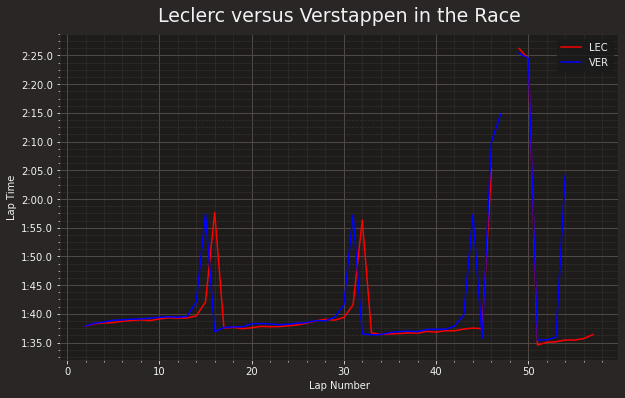

In [62]:
laps = bahrain_race.load_laps(with_telemetry=True)
drv_1 = laps.pick_driver('LEC')
drv_2 = laps.pick_driver('VER')

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(drv_1['LapNumber'], drv_1['LapTime'], color='red')
ax.plot(drv_2['LapNumber'], drv_2['LapTime'], color='blue')
ax.set_title('Leclerc versus Verstappen in the Race')
ax.set_xlabel('Lap Number')
ax.set_ylabel("Lap Time")
plt.legend(['LEC', 'VER'])

c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1095: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '44', '63', '20', '77', '31', '22', '14', '24', '47', '18', '23', '3', '4', '6', '27', '11', '1', '10']


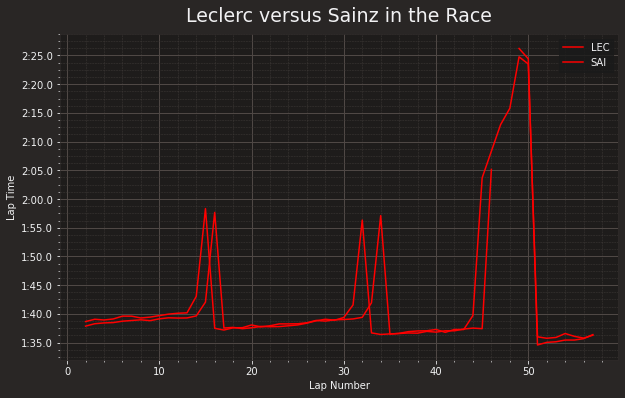

In [63]:
laps = bahrain_race.load_laps(with_telemetry=True)
drv_1 = laps.pick_driver('LEC')
drv_2 = laps.pick_driver('SAI')

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(drv_1['LapNumber'], drv_1['LapTime'], color='red')
ax.plot(drv_2['LapNumber'], drv_2['LapTime'], color='red')
ax.set_title('Leclerc versus Sainz in the Race')
ax.set_xlabel('Lap Number')
ax.set_ylabel("Lap Time")
plt.legend(['LEC', 'SAI'])

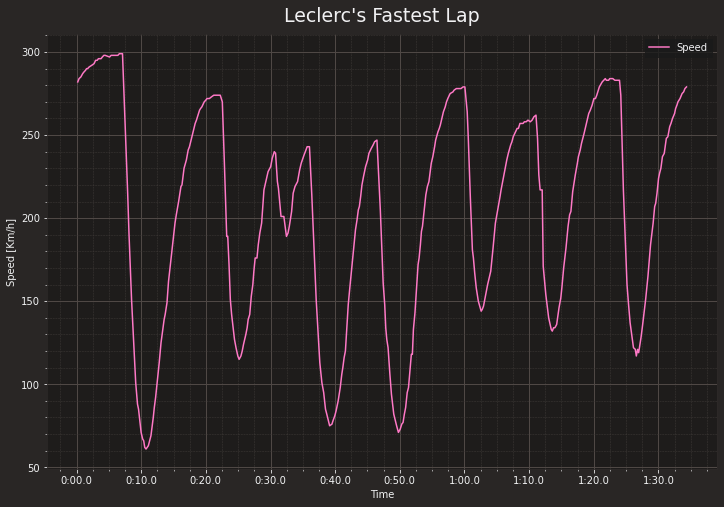

In [64]:
lec_fastest_lap = bahrain_race_laps.pick_driver('LEC').pick_fastest()
lec_car_data = lec_fastest_lap.get_car_data()
t = lec_car_data['Time']
velo = lec_car_data['Speed']

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(t, velo, label='Speed')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title("Leclerc's Fastest Lap")
ax.legend()

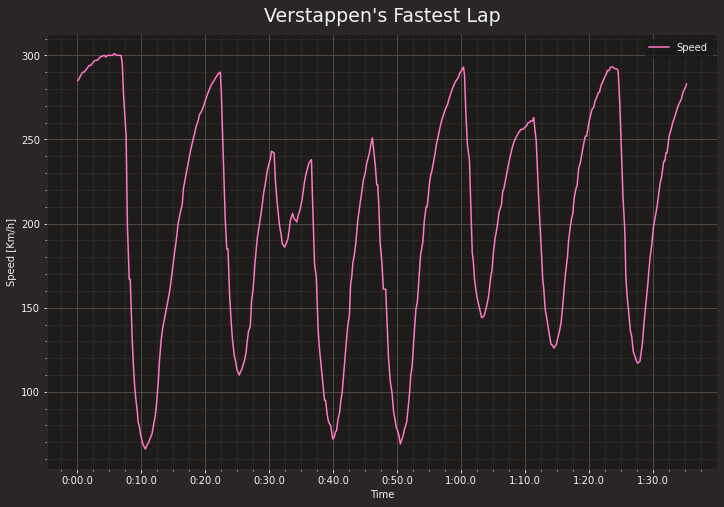

In [65]:
ver_fastest_lap = bahrain_race_laps.pick_driver('VER').pick_fastest()
ver_car_data = ver_fastest_lap.get_car_data()
t = ver_car_data['Time']
velo = ver_car_data['Speed']

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(t, velo, label='Speed')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title("Verstappen's Fastest Lap")
ax.legend()

FastF1 Documentation : https://theoehrly.github.io/Fast-F1/index.html